In [12]:
import pandas as pd
#import modules and test files

test_set = pd.read_csv("test.txt", sep=";")
train_set = pd.read_csv("train.txt", sep=";")
val_set = pd.read_csv("val.txt", sep=";")
val_set.columns = ["text","sentiment"]
val_set.head()

,text,sentiment
0,i feel like i am still looking at a blank canv...,sadness
1,i feel like a faithful servant,love
2,i am just feeling cranky and blue,anger
3,i can have for a treat or if i am feeling festive,joy
4,i start to feel more appreciative of what god ...,joy


In [13]:
# Load the regular expression library
import re
# Remove punctuation
val_set['text'] = \
val_set['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
val_set['text'] = \
val_set['text'].map(lambda x: x.lower())
# Print out the first rows of papers
val_set['text'].head()

0    i feel like i am still looking at a blank canv...
1                       i feel like a faithful servant
2                    i am just feeling cranky and blue
3    i can have for a treat or if i am feeling festive
4    i start to feel more appreciative of what god ...
Name: text, dtype: object

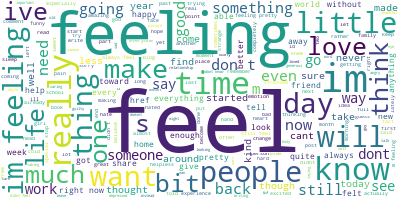

In [15]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(val_set['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [17]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = val_set.text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hiennguyen/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['feel', 'like', 'still', 'looking', 'blank', 'canvas', 'blank', 'pieces', 'paper']
